In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv("Data/Player_data.csv")

In [54]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",19.7,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",32.1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",14.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",13.6,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.

In [55]:
print(df.columns[:20])

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'SoT%'],
      dtype='object')


### Initially we will be dropping the following columns
- Player
- Nation
- Pos
- Squad
- Comp
- Age
- Born
- MP
- Starts
- Min
- 90s

In [56]:
df1 = df.drop(['Player', 'Nation', 'Squad', 'Comp', 'Born', 'MP',
       'Starts', 'Min', '90s'], axis=1)
df1.head()

,Pos,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,DF,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,DF,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,DF,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,DF,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.25,0.96,0.74,0.37,0.15,0.59,1.47,40.0,0.88,10.60,4.71,44.4,5.96,3.46,1.18,1.91,0.37,1.54,1.10,2.43,0.00,58.3,4.04,23.7,31.0,7.35,0.59,0.06929674099,0.4065180103,0.5317324185,0.1260720412,0.01012006861,54.3,0.22,0.44,50.0,0.29,0.00,32.0,169.9,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,DF

### Label encoding the "Pos" column

In [57]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df1['Pos_Encoded'] = label_encoder.fit_transform(df1['Pos'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: DF
1: DF,FW
2: DF,MF
3: FW
4: FW,DF
5: FW,MF
6: GK
7: GK,MF
8: MF
9: MF,DF
10: MF,FW


### Dropping pos column

In [58]:
df1 = df1.drop('Pos',axis=1)
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.25,0.96,0.74,0.37,0.15,0.59,1.47,40.0,0.88,10.60,4.71,44.4,5.96,3.46,1.18,1.91,0.37,1.54,1.10,2.43,0.00,58.3,4.04,23.7,31.0,7.35,0.59,0.06929674099,0.4065180103,0.5317324185,0.1260720412,0.01012006861,54.3,0.22,0.44,50.0,0.29,0.00,32.0,169.9,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,0


### Removing null values and '#DIV/0!'

In [59]:
df1.replace('#DIV/0!', 0, inplace=True)
df1.fillna(0, inplace=True)
print(df1.isnull().sum())

Age                    0
Ast/90                 0
npG/90                 0
npG+A/90               0
xA/90                  0
                      ..
PassTarget/90          0
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Pos_Encoded            0
Length: 119, dtype: int64


### Scaling all columns except 'pos'

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1.drop('Pos_Encoded', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=df1.drop('Pos_Encoded', axis=1).columns)
scaled_df['Pos_Encoded'] = df1['Pos_Encoded']
scaled_df.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,-0.653737,-0.744132,0.749630,0.725008,-0.072261,-0.294757,0.613155,0.755624,0.125303,0.249524,1.001523,1.099985,1.136055,0.218247,0.278419,0.425629,-0.028948,-0.261317,-0.082520,-0.270864,-0.213498,0.491190,0.728628,0.029801,1.355346,0.453113,1.427745,0.690361,0.169279,-0.169842,-0.140030,0.469394,0.435851,1.462868,0.333109,1.650182,-0.893053,-0.287009,1.802477,-0.326264,1.623441,0.439222,0.555674,0.441542,-0.224301,-0.083349,0.021756,-0.168589,-0.356025,-0.304465,-0.226990,-0.115585,-0.102186,0.512531,-0.256788,-0.150819,-0.256931,-0.078625,0.055148,-0.023321,0.334164,-0.092096,-0.407358,0.371015,0.421052,0.300247,0.329903,-0.451691,-0.223886,0.416727,0.584304,-0.756167,-0.666070,0.109944,0.205312,0.050512,0.841771,0.069584,0.261880,0.669107,-0.186328,0.302338,0.435523,0.275458,-0.082618,-0.268938,-0.029322,0.129607,-0.087452,-0.277960,0.359975,-0.382931,-0.294003,-0.294073,-0.420628,-0.246878,0.183926,0.028058,0.031667,0.652945,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0
1,1.458658,-0.349578,-0.022716,-0.281880,-0.465387,-0.327012,-0.510893,-0.513823,-0.381540,0.409017,1.286238,1.634900,-0.429985,-0.243278,0.550620,0.365953,0.719896,0.544914,0.827996,1.079330,1.068408,-0.494709,-0.570287,0.245166,1.437274,1.313239,0.703960,0.915544,0.577831,0.718123,-0.692294,0.038932,-0.773009,-0.425556,0.019437,0.702529,-0.550842,0.699239,-0.395784,-0.321993,0.026832,-0.777185,0.833387,-0.538855,-0.204852,1.498804,-0.615797,0.092819,-0.545459,-0.373585,-0.060326,0.054880,-0.207714,-0.641534,-0.777120,-0.715986,-0.279500,-0.309998,-0.236409,-0.304465,-0.226990,-0.480652,-0.397027,-0.158375,-0.256788,-0.150819,-0.256931,-0.078625,0.462671,0.461669,0.903552,-0.014926,-0.458992,-0.031405,-0.257076,0.586697,-0.310585,-0.306929,0.140491,0.797037,0.938232,-0.634648,-0.797238,0.125822,0.802172,-0.163658,0.852436,1.599914,-0.238924,0.553143,0.438457,1.674318,0.300045,-1.234180,-0.638063,0.089416,1.043392,0.053798,-1.300623,-0.569241,0.684486,-0.455495,-0.528050,0.267924,-0.466229,-0.126419,0.486556,0.635860,0.589612,-0.668867,-0.705183,-0.524026,-0.644202,-0.502675,0.018461,0.434973,0.816421,-0.859809,0
2,-0.267517,-0.349578,-0.572368,-0.581208,-0.533018,-0.168919,-0.393792,-0.137921,-0.279321,-0.056101,-0.653737,-0.744132,-0.301512,-0.243278,0.239179,-0.492970,0.079449,0.056955,0.283212,0.572273,0.724732,-0.695003,-0.824448,0.527817,0.278419,0.256561,0.378223,1.215158,1.142838,0.318814,-0.59435

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

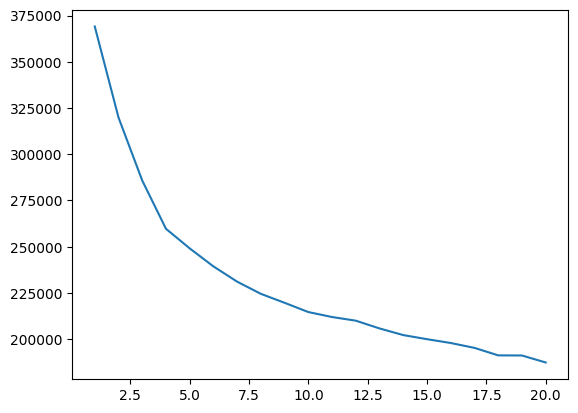

In [62]:
clusters=list(range(1,21))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(scaled_df)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [66]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(scaled_df)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.17120137692091705


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.2037855808062185


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.2231317678692733


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.18019912997615745


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.16688733177081622


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.16591689783228025


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.17205676502537542


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.1588125654006206


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.15673260687462337


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the silhouette score is 0.16203476008231663


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the silhouette score is 0.14370656530049378


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the silhouette score is 0.1461630276387181


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the silhouette score is 0.14745534344380612


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, the silhouette score is 0.15066335110014675


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16, the silhouette score is 0.15099759643503163


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17, the silhouette score is 0.15196274892132303


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18, the silhouette score is 0.13715275407848465


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19, the silhouette score is 0.13150837483465347


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20, the silhouette score is 0.13156795456242054


### Applying K-means for 15 clusters

In [67]:
cluster = KMeans(n_clusters=15, max_iter=150, random_state= 15)
cluster.fit(scaled_df)

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=15, random_state=15)

In [68]:
df1['Cluster_Id'] = cluster.labels_
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_Id
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0,5
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0,2
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0,2
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.74,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.25,0.96,0.74,0.37,0.15,0.59,1.47,40.0,0.88,10.60,4.71,44.4,5.96,3.46,1.18,1.91,0.37,1.54,1.10,2.43,0.00,58.3,4.04,23.7,31.0,7.35,0.59,0.06929674099,0.4065180103,0.5317324185,0.1260720412,0.01012006861,54.3,0.22,0.44,50.0,0.29,0.00,32.0,169.9,92.7,3.24,0.66,0.00,0.22,0.00,34.8,

In [69]:
df['Cluster']=df1['Cluster_Id']
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Cluster
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",19.7,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,0.00,0.0,20.3,0.15,0.07,-0.06,45.1,57.2,78.9,756.6,352.5,23.00,26.00,88.7,17.3,21.2,81.3,3.96,7.66,51.7,0.56,3.45,1.32,0.20,5.69,47.3,9.90,1.83,0.10,5.69,1.02,1.73,36.4,11.10,9.70,37.7,9.85,1.27,7.97,0.15,0.61,1.12,1.47,1.73,1.32,1.12,0.15,0.05,0.00,0.00,0.00,0.15,0.10,0.05,0.0,0.0,0.0,0.0,1.68,0.96,1.07,0.56,0.05,0.76,2.13,35.7,1.37,10.50,3.50,33.5,6.60,2.84,1.02,1.57,0.36,1.22,1.73,2.03,0.05,67.2,3.65,20.6,32.6,17.50,1.93,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381,57.2,0.46,1.07,42.9,0.46,0.00,37.2,178.8,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,5
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",32.1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,0.20,0.6,10.2,0.00,0.11,0.04,46.9,53.4,87.8,1049.7,361.9,10.50,11.70,89.1,27.8,29.6,93.9,8.32,11.40,73.0,0.12,2.52,0.03,0.00,2.83,51.6,1.84,1.84,0.00,5.23,1.21,0.00,42.5,3.86,7.04,35.4,14.80,1.78,0.00,0.09,0.12,0.81,0.75,0.40,0.34,0.31,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.24,1.43,1.59,0.62,0.03,0.50,1.18,42.1,0.69,11.80,4.55,38.5,7.85,3.43,0.53,1.59,0.62,0.97,1.74,5.30,0.00,65.0,8.69,37.5,30.7,1.28,0.65,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01,63.2,0.37,0.62,60.0,0.40,0.03,41.7,235.5,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,2
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",14.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,0.00,0.0,11.3,0.00,0.09,-0.09,36.1,44.6,80.9,870.6,313.6,8.93,9.57,93.3,17.3,19.6,88.3,9.43,14.60,64.4,0.21,2.14,0.14,0.00,2.21,42.7,1.86,1.71,0.00,4.79,3.07,0.07,30.3,3.64,10.60,13.6,27.60,2.14,0.14,0.00,0.00,1.07,0.36,0.21,0.50,0.29,0.00,0.00,0.14,0.07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.57,0.79,1.14,0.43,0.00,0.64,1.21,52.9,0.57,7.64,3.21,42.1,5.21,2.07,0.36,1.14,0.36,0.79,2.29,10.10,0.14,61.1,10.10,37.0,26.4,1.79,1.14,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781,59.3,0.36,0.43,83.3,0.36,0.00,32.6,215.2,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,2
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",13.6,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,0.11,0.5,16.0,0.00,0.07,0.02,41.5,50.7,81.9,888.0,312.8,13.00,15.00,86.8,20.4,22.8,89.4,7.79,11.80,65.8,0.15,3.68,0.22,0.15,3.16,46.5,4.19,1.25,0.07,5.51,1.69,0.59,31.8,6.84,12.00,5.0,36.80,3.97,2.94,0.07,0.22,0.51,0.37,0.7

In [71]:
print(scaled_df.shape)
print(df.shape)
print(df1.shape)

(2823, 119)
(2823, 129)
(2823, 120)


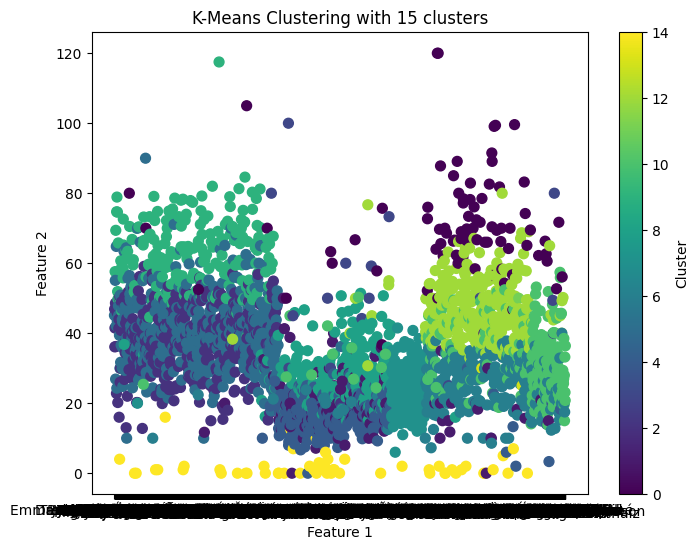

In [74]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Player'], df['PassCmp/90'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 15 clusters')
plt.colorbar(label='Cluster')
plt.show()